# Run model module locally

In [4]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/wgan/trained_model"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(32)
os.environ["TRAIN_STEPS"] = str(200)
os.environ["SAVE_SUMMARY_STEPS"] = str(100)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(1000)
os.environ["KEEP_CHECKPOINT_MAX"] = str(10)
os.environ["INPUT_FN_AUTOTUNE"] = "False"

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(32)
os.environ["EVAL_STEPS"] = str(100)
os.environ["START_DELAY_SECS"] = str(60)
os.environ["THROTTLE_SECS"] = str(120)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(32)
os.environ["WIDTH"] = str(32)
os.environ["DEPTH"] = str(3)

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["GENERATOR_PROJECTION_DIMS"] = "4,4,256"
os.environ["GENERATOR_NUM_FILTERS"] = "128,128,128"
os.environ["GENERATOR_KERNEL_SIZES"] = "4,4,4"
os.environ["GENERATOR_STRIDES"] = "2,2,2"
os.environ["GENERATOR_FINAL_NUM_FILTERS"] = str(3)
os.environ["GENERATOR_FINAL_KERNEL_SIZE"] = str(5)
os.environ["GENERATOR_FINAL_STRIDE"] = str(2)
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_FINAL_ACTIVATION"] = "tanh"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_OPTIMIZER"] = "RMSProp"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0002)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.5)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.999)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_RMSPROP_DECAY"] = str(0.9)
os.environ["GENERATOR_RMSPROP_MOMENTUM"] = str(0.)
os.environ["GENERATOR_RMSPROP_EPSILON"] = str(1e-10)
os.environ["GENERATOR_CLIP_GRADIENTS"] = "None"
os.environ["GENERATOR_CLIP_WEIGHTS"] = ""
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for critic hyperparameters.
os.environ["CRITIC_NUM_FILTERS"] = "64,128,128,256"
os.environ["CRITIC_KERNEL_SIZES"] = "3,3,3,3"
os.environ["CRITIC_STRIDES"] = "1,2,2,2"
os.environ["CRITIC_DROPOUT_RATES"] = "0.3,0.3,0.3,0.3"
os.environ["CRITIC_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["CRITIC_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["CRITIC_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["CRITIC_OPTIMIZER"] = "RMSProp"
os.environ["CRITIC_LEARNING_RATE"] = str(0.0002)
os.environ["CRITIC_ADAM_BETA1"] = str(0.5)
os.environ["CRITIC_ADAM_BETA2"] = str(0.999)
os.environ["CRITIC_ADAM_EPSILON"] = str(1e-8)
os.environ["CRITIC_RMSPROP_DECAY"] = str(0.9)
os.environ["CRITIC_RMSPROP_MOMENTUM"] = str(0.)
os.environ["CRITIC_RMSPROP_EPSILON"] = str(1e-10)
os.environ["CRITIC_CLIP_GRADIENTS"] = "None"
os.environ["CRITIC_CLIP_WEIGHTS"] = ""
os.environ["CRITIC_TRAIN_STEPS"] = str(5)


## Train WGAN model

In [9]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/wgan_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    --input_fn_autotune=${INPUT_FN_AUTOTUNE} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --latent_size=${LATENT_SIZE} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_num_filters=${GENERATOR_NUM_FILTERS} \
    --generator_kernel_sizes=${GENERATOR_KERNEL_SIZES} \
    --generator_strides=${GENERATOR_STRIDES} \
    --generator_final_num_filters=${GENERATOR_FINAL_NUM_FILTERS} \
    --generator_final_kernel_size=${GENERATOR_FINAL_KERNEL_SIZE} \
    --generator_final_stride=${GENERATOR_FINAL_STRIDE} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_rmsprop_decay=${GENERATOR_RMSPROP_DECAY} \
    --generator_rmsprop_momentum=${GENERATOR_RMSPROP_MOMENTUM} \
    --generator_rmsprop_epsilon=${GENERATOR_RMSPROP_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_clip_weights=${GENERATOR_CLIP_WEIGHTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --critic_num_filters=${CRITIC_NUM_FILTERS} \
    --critic_kernel_sizes=${CRITIC_KERNEL_SIZES} \
    --critic_strides=${CRITIC_STRIDES} \
    --critic_dropout_rates=${CRITIC_DROPOUT_RATES} \
    --critic_leaky_relu_alpha=${CRITIC_LEAKY_RELU_ALPHA} \
    --critic_l1_regularization_scale=${CRITIC_L1_REGULARIZATION_SCALE} \
    --critic_l2_regularization_scale=${CRITIC_L2_REGULARIZATION_SCALE} \
    --critic_optimizer=${CRITIC_OPTIMIZER} \
    --critic_learning_rate=${CRITIC_LEARNING_RATE} \
    --critic_adam_beta1=${CRITIC_ADAM_BETA1} \
    --critic_adam_beta2=${CRITIC_ADAM_BETA2} \
    --critic_adam_epsilon=${CRITIC_ADAM_EPSILON} \
    --critic_rmsprop_decay=${CRITIC_RMSPROP_DECAY} \
    --critic_rmsprop_momentum=${CRITIC_RMSPROP_MOMENTUM} \
    --critic_rmsprop_epsilon=${CRITIC_RMSPROP_EPSILON} \
    --critic_clip_gradients=${CRITIC_CLIP_GRADIENTS} \
    --critic_clip_weights=${CRITIC_CLIP_WEIGHTS} \
    --critic_train_steps=${CRITIC_TRAIN_STEPS}


train_and_evaluate: args = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/wgan/trained_model2/', 'train_batch_size': 32, 'train_steps': 200, 'save_summary_steps': 100, 'save_checkpoints_steps': 1000, 'keep_checkpoint_max': 10, 'eval_batch_size': 32, 'eval_steps': 100, 'start_delay_secs': 60, 'throttle_secs': 120, 'height': 32, 'width': 32, 'depth': 3, 'latent_size': 512, 'generator_projection_dims': [4, 4, 256], 'generator_num_filters': [128, 128, 128], 'generator_kernel_sizes': [4, 4, 4], 'generator_strides': [2, 2, 2], 'generator_final_num_filters': 3, 'generator_final_kernel_size': 5, 'generator_final_stride': 2, 'generator_leaky_relu_alpha': 0.2, 'generator_final_activation': 'tanh', 'generator_l1_regularization_scale': 0.0, 'generator_l2_regularization_scale': 0.0, 'generator_optimizer'

Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/checkpoint#1592515612554680...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/#1592515509270210...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/events.out.tfevents.1592515509.tf-1-15#1592515510276868...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/graph.pbtxt#1592515516475391...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/model.ckpt-0.data-00000-of-00001#1592515520750814...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/model.ckpt-0.index#1592515521168962...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/model.ckpt-0.meta#1592515523446603...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/model.ckpt-200.data-00000-of-00001#1592515611177739...
Removing gs://machine-learning-1234-bucket/gan/wgan/trained_model2/model.ckpt-200.index#1592515611587258...
Removing gs://machine-learni

## Prediction

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [1]:
!gsutil ls gs://machine-learning-1234-bucket/gan/wgan/trained_model/export/exporter

gs://machine-learning-1234-bucket/gan/wgan/trained_model/export/exporter/
gs://machine-learning-1234-bucket/gan/wgan/trained_model/export/exporter/1592509480/
gs://machine-learning-1234-bucket/gan/wgan/trained_model/export/exporter/1592517341/


In [4]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/wgan/trained_model/export/exporter/1592517341"
)
predictions = predict_fn(
    {
        "Z": np.random.normal(size=(10, 512))
    }
)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/wgan/trained_model/export/exporter/1592517341/variables/variables


In [5]:
print(list(predictions.keys()))

['generated_images']


Convert image back to the original scale.

In [6]:
generated_images = np.clip(
    a=((predictions["generated_images"] + 1.0) * (255. / 2)).astype(np.int32),
    a_min=0,
    a_max=255
)

In [7]:
print(generated_images.shape)

(10, 32, 32, 3)


In [8]:
def plot_images(images):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, height, width, depth].
        
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            image,
            cmap=plt.cm.binary
        )
    plt.show()

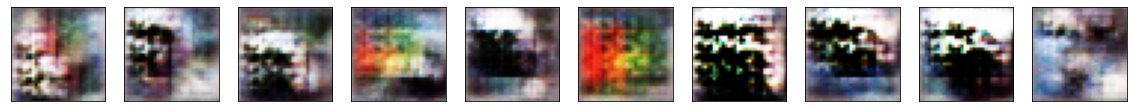

In [9]:
plot_images(generated_images)